In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import io
import os,os.path
import pathlib
import math
import matplotlib.pyplot as plt
from scipy.stats import t
import dataframe_image as dfi # save dataframe as images

path = str(pathlib.Path().absolute())
path_i7 = str(pathlib.Path().absolute())+'/Linpack-i7'
path_i5 = str(pathlib.Path().absolute())+'/Linpack-i5'

## CPU Intel i7-3820QM @2.70 GHz 4-core 8-thread

## Precampione

In [2]:
df_i7_prec = pd.DataFrame(columns=['Size','LDA','Align.','Time(s)','GFlops','Residual','Residual(norm)','Check'])

for root, dirs, files in os.walk(path_i7+'/precampione'):
    for file in files:
        if file.endswith(".txt"):
            input_file = io.open(os.path.join(root, file), mode='r')
            rows = input_file.readlines()
            input_file.close()
            row=rows[22].split()
            df_i7_prec.loc[len(df_i7_prec)] = row

            
# Columns casting
df_i7_prec.Size = df_i7_prec.Size.astype('int64')
df_i7_prec.LDA = df_i7_prec.LDA.astype('int64')
df_i7_prec['Align.'] = df_i7_prec['Align.'].astype('int64')
df_i7_prec['Time(s)'] = df_i7_prec['Time(s)'].astype('float64')
df_i7_prec['GFlops'] = df_i7_prec['GFlops'].astype('float64')
df_i7_prec['Residual'] = df_i7_prec['Residual'].astype('float64')
df_i7_prec['Residual(norm)'] = df_i7_prec['Residual(norm)'].astype('float64')

# Reordering
df_i7_prec.sort_values(by=["Size"], inplace=True, ignore_index=True)


# Defining parameters
error=5
alpha=0.05
n=5
degrees_freedom=n-1
quantile=t.ppf(1 - alpha/2, df=degrees_freedom)

number_df_i7_prec = pd.DataFrame(columns=['Size', 'Dimensione campionaria i7'], dtype='int64')

groups = df_i7_prec.groupby("Size")

for gr in groups:
    temp_df=pd.DataFrame(groups.get_group(gr[0]))
    stand_dev = temp_df.GFlops.std()
   # print(stand_dev)
    n=((stand_dev * quantile)/error)**2
#     print(n)
    n=int(math.ceil(n))
    if (n<5):
        n=5
    list = [int(gr[0]), n]
    number_df_i7_prec.loc[len(number_df_i7_prec)]=list

number_df_i7_prec

,Size,Dimensione campionaria i7
0,1000,10
1,5000,6
2,10000,10
3,20000,8
4,30000,5


## CPU Intel i5-8256U @1.60 GHz 4-core 8-thread

## Precampione

In [3]:
df_i5_prec = pd.DataFrame(columns=['Size','LDA','Align.','Time(s)','GFlops','Residual','Residual(norm)','Check'])

for root, dirs, files in os.walk(path_i5+'/precampione'):
    for file in files:
        if file.endswith(".txt"):
            input_file = io.open(os.path.join(root, file), mode='r')
            rows = input_file.readlines()
            input_file.close()
            row=rows[22].split()
            df_i5_prec.loc[len(df_i5_prec)] = row

            
# Columns casting
df_i5_prec.Size = df_i5_prec.Size.astype('int64')
df_i5_prec.LDA = df_i5_prec.LDA.astype('int64')
df_i5_prec['Align.'] = df_i5_prec['Align.'].astype('int64')
df_i5_prec['Time(s)'] = df_i5_prec['Time(s)'].astype('float64')
df_i5_prec['GFlops'] = df_i5_prec['GFlops'].astype('float64')
df_i5_prec['Residual'] = df_i5_prec['Residual'].astype('float64')
df_i5_prec['Residual(norm)'] = df_i5_prec['Residual(norm)'].astype('float64')

# Reordering
df_i5_prec.sort_values(by=["Size"], inplace=True, ignore_index=True)


# Defining parameters
error=5
alpha=0.05
n=5
degrees_freedom=n-1
quantile=t.ppf(1 - alpha/2, df=degrees_freedom)

number_df_i5_prec = pd.DataFrame(columns=['Size', 'Dimensione campionaria i5'], dtype='int64')

groups = df_i5_prec.groupby("Size")

for gr in groups:
    temp_df=pd.DataFrame(groups.get_group(gr[0]))
    stand_dev = temp_df.GFlops.std()
#     print(stand_dev)
    n=((stand_dev * quantile)/error)**2
    n=int(math.ceil(n))
    if (n<5):
        n=5
    list = [int(gr[0]), n]
    number_df_i5_prec.loc[len(number_df_i5_prec)]=list

number_df_i5_prec

,Size,Dimensione campionaria i5
0,1000,7
1,5000,10
2,10000,5
3,20000,11
4,30000,5


## Numero di campioni complessivi per ogni dimensione:

In [21]:
number_df_tot = pd.merge(number_df_i7_prec, number_df_i5_prec, how='left', on='Size')

number_df_tot['Dimensione campionaria totale'] = number_df_tot[['Dimensione campionaria i7','Dimensione campionaria i5']].max(axis=1)

number_df_tot.columns = ['Size', 'Dim campionaria i7', 'Dim campionaria i5',
       'Dim campionaria totale']

number_df_tot

In [ ]:
# dfi.export(number_df_tot,"dim_camp.png")

## i7

In [5]:
df_i7 = pd.DataFrame(df_i7_prec)

for root, dirs, files in os.walk(path_i7+'/samples'):
    for file in files:
        if file.endswith(".txt"):
            input_file = io.open(os.path.join(root, file), mode='r')
            rows = input_file.readlines()
            input_file.close()
            row=rows[22].split()
            df_i7.loc[len(df_i7)] = row

            
# Columns casting
df_i7.Size = df_i7.Size.astype('int64')
df_i7.LDA = df_i7.LDA.astype('int64')
df_i7['Align.'] = df_i7['Align.'].astype('int64')
df_i7['Time(s)'] = df_i7['Time(s)'].astype('float64')
df_i7['GFlops'] = df_i7['GFlops'].astype('float64')
df_i7['Residual'] = df_i7['Residual'].astype('float64')
df_i7['Residual(norm)'] = df_i7['Residual(norm)'].astype('float64')

# Reordering
df_i7.sort_values(by=["Size"], inplace=True, ignore_index=True)


df_i7

,Size,LDA,Align.,Time(s),GFlops,Residual,Residual(norm),Check
0,1000,1000,4,0.013,51.2915,1.257328e-12,0.037544,pass
1,1000,1000,4,0.011,59.6486,1.257328e-12,0.037544,pass
2,1000,1000,4,0.011,62.5442,1.257328e-12,0.037544,pass
3,1000,1000,4,0.011,62.5442,1.257328e-12,0.037544,pass
4,1000,1000,4,0.010,65.5132,1.257328e-12,0.037544,pass
5,1000,1000,4,0.010,68.8099,1.257328e-12,0.037544,pass
6,1000,1000,4,0.010,67.0504,1.257328e-12,0.037544,pass
7,1000,1000,4,0.010,65.3129,1.257328e-12,0.037544,pass
8,1000,1000,4,0.010,63.7572,1.257328e-12,0.037544,pass
9,1000,1000,4,0.010,65.1233,1.257328e-12,0.037544,pass


In [6]:
groups_i7=df_i7.groupby("Size")

for gr in groups_i7:
    temp_df=pd.DataFrame(groups_i7.get_group(gr[0]))
    temp_df.to_csv(path_i7+'/outputs/'+ f'i7_{gr[0]}.csv', index=False)

## i5

In [7]:
df_i5 = pd.DataFrame(df_i5_prec)

for root, dirs, files in os.walk(path_i5+'/samples'):
    for file in files:
        if file.endswith(".txt"):
            input_file = io.open(os.path.join(root, file), mode='r')
            rows = input_file.readlines()
            input_file.close()
            row=rows[22].split()
            df_i5.loc[len(df_i5)] = row

            
# Columns casting
df_i5.Size = df_i5.Size.astype('int64')
df_i5.LDA = df_i5.LDA.astype('int64')
df_i5['Align.'] = df_i5['Align.'].astype('int64')
df_i5['Time(s)'] = df_i5['Time(s)'].astype('float64')
df_i5['GFlops'] = df_i5['GFlops'].astype('float64')
df_i5['Residual'] = df_i5['Residual'].astype('float64')
df_i5['Residual(norm)'] = df_i5['Residual(norm)'].astype('float64')

# Reordering
df_i5.sort_values(by=["Size"], inplace=True, ignore_index=True, kind='mergesort')


df_i5

,Size,LDA,Align.,Time(s),GFlops,Residual,Residual(norm),Check
0,1000,1000,4,0.011,63.0098,1.022959e-12,0.030332,pass
1,1000,1000,4,0.010,67.7028,1.022959e-12,0.030332,pass
2,1000,1000,4,0.010,68.8814,1.022959e-12,0.030332,pass
3,1000,1000,4,0.010,70.3741,1.022959e-12,0.030332,pass
4,1000,1000,4,0.011,59.7557,1.022959e-12,0.030332,pass
5,1000,1000,4,0.009,76.7154,1.022959e-12,0.030332,pass
6,1000,1000,4,0.009,77.9268,1.022959e-12,0.030332,pass
7,1000,1000,4,0.009,76.1796,1.022959e-12,0.030332,pass
8,1000,1000,4,0.012,56.1683,1.022959e-12,0.030332,pass
9,1000,1000,4,0.009,74.7899,1.022959e-12,0.030332,pass


In [8]:
groups_i5=df_i5.groupby("Size")

for gr in groups:
    temp_df=pd.DataFrame(groups_i5.get_group(gr[0]))
    temp_df.to_csv(path_i5+'/outputs/'+ f'i5_{gr[0]}.csv', index=False)

## Differenze

In [9]:
for gr in groups_i5:
    temp_i7=pd.DataFrame(groups_i7.get_group(gr[0]))
    temp_i5=pd.DataFrame(groups_i5.get_group(gr[0]))
    temp_df=pd.DataFrame()
    temp_df['Size']=temp_i7['Size']
    temp_df['GFlops_i7']=temp_i7['GFlops']
    temp_df['GFlops_i5']=temp_i5['GFlops']
    temp_df['Differenza']=temp_i7['GFlops']-temp_i5['GFlops']
    temp_df.to_csv(path+'/outputs_diff/'+f'diff_{gr[0]}.csv', index=False)
    globals()['df_'+str(gr[0])]=pd.DataFrame(temp_df)

In [17]:
# dfi.export(df_1000,"diff_1000.png")
# dfi.export(df_5000,"diff_5000.png")
# dfi.export(df_10000,"diff_10000.png")
# dfi.export(df_20000,"diff_20000.png")
# dfi.export(df_30000,"diff_30000.png")

# Tentativo

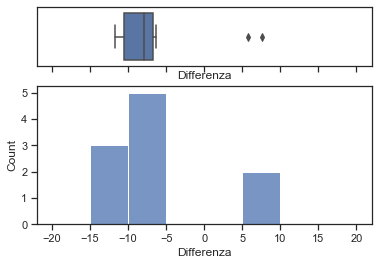

In [11]:
sn.set(style="ticks")

data = df_1000['Differenza']

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.3, .7)})

sn.boxplot(x=data, ax=ax_box)
sn.histplot(data=data, ax=ax_hist,binwidth=5, binrange=(-20,20))


ax_box.set(yticks=[]);
# sn.despine(ax=ax_hist)
# sn.despine(ax=ax_box, left=True)

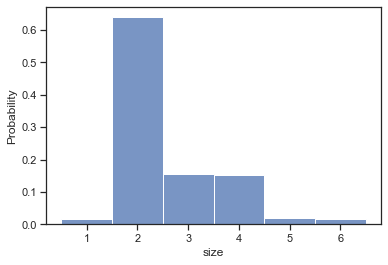

In [12]:
tips = sn.load_dataset("tips")
sn.histplot(data=tips, x="size", stat="probability", discrete=True)